In [1]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.9MB/s 
     |████████████████████████████████| 11.8MB 55.4MB/s 
     |████████████████████████████████| 10.1MB 36.1MB/s 


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [0]:
data = pd.read_csv("train.csv")

Remove unreasonable coordinates

In [4]:
print("Longitude Min: {}".format(data["X"].min()))
print("Longitude Max: {}".format(data["X"].max()))
print("Latitude Min: {}".format(data["Y"].min()))
print("Latitude Min: {}".format(data["Y"].max()))

Longitude Min: -122.51364206429
Longitude Max: -120.5
Latitude Min: 37.7078790224135
Latitude Min: 90.0


In [0]:
data = data[data["Y"] <= 40]

In [0]:
data = data.sample(n=1000)

In [0]:
data["points"] = data.apply(lambda row: Point(row["X"], row["Y"]), axis=1)

In [8]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,points
607802,2006-10-02 08:54:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Monday,INGLESIDE,"ARREST, BOOKED",100 Block of ALEMANY BL,-122.409215,37.736173,POINT (-122.409215255969 37.7361732498955)
147928,2013-05-30 08:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,NORTHERN,NONE,500 Block of TURK ST,-122.418193,37.782326,POINT (-122.418192861208 37.78232633689221)
141071,2013-06-29 18:00:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,SOUTHERN,NONE,700 Block of THE EMBARCADEROSOUTH ST,-122.400712,37.802385,POINT (-122.40071180486 37.80238450205921)
857264,2003-04-14 16:00:00,MISSING PERSON,MISSING ADULT,Monday,RICHMOND,LOCATED,2500 Block of SUTTER ST,-122.442387,37.784984,POINT (-122.442386593523 37.7849835227905)
54120,2014-08-23 12:11:00,FRAUD,FALSE ID TO PEACE OFFICER,Saturday,TENDERLOIN,NONE,400 Block of ELLIS ST,-122.413609,37.784697,POINT (-122.413609328985 37.784696907904)


In [0]:
geo_data = gpd.GeoDataFrame(data, geometry="points")
geo_data.crs = {"init": "epsg:4326"}

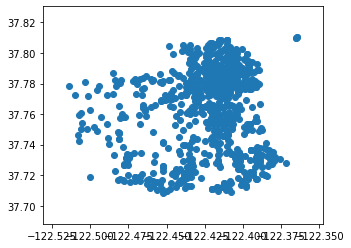

In [10]:
geo_data.plot()
plt.show()

Police Department Districts

In [11]:
data["PdDistrict"].unique()

array(['INGLESIDE', 'NORTHERN', 'SOUTHERN', 'RICHMOND', 'TENDERLOIN',
       'MISSION', 'TARAVAL', 'CENTRAL', 'BAYVIEW', 'PARK'], dtype=object)

In [0]:
sfpd = gpd.read_file("current_police_districts.geojson")

In [13]:
sfpd.head()

,shape_area,shape_leng,company,shape_le_1,district,geometry
0,91344142.1925,87550.2751419,B,100231.353916,SOUTHERN,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917..."
1,201384622.317,163013.798332,C,144143.480351,BAYVIEW,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."
2,80623839.7922,40152.783389,D,40518.8342346,MISSION,"MULTIPOLYGON (((-122.40954 37.76932, -122.4086..."
3,82781685.5603,56493.858208,E,50608.3103205,NORTHERN,"MULTIPOLYGON (((-122.43379 37.80793, -122.4337..."
4,11072154.5623,12424.2689691,J,18796.7841847,TENDERLOIN,"MULTIPOLYGON (((-122.40217 37.78626, -122.4171..."


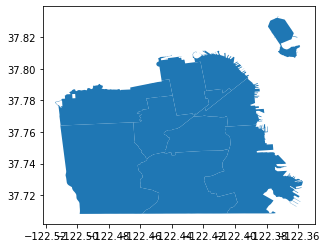

In [14]:
sfpd.plot()
plt.show()

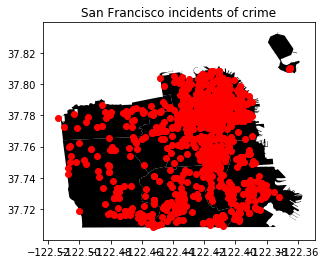

In [17]:
fig, ax = plt.subplots(1)
sfpd_map = sfpd.plot(ax=ax, color="black")
geo_data.plot(ax=sfpd_map, color="red")
ax.set_title("Crime in San Francisco")
plt.show()

References:


*   https://data.sfgov.org/Public-Safety/Current-Police-Districts/wkhw-cjsf

